<a href="https://colab.research.google.com/github/awhooshingwind/Math254/blob/main/hw/mod3_HW_greens_flux.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

from sympy import Curve, line_integrate, ln, E
import sympy as sym

sym.init_printing()

In [56]:
x, y, r, theta, t = sym.symbols('x y r theta, t')

In [87]:
def greens_ther(P, Q):
  dQx = sym.diff(Q, x)
  dPy = sym.diff(P, y)
  display(dQx, dPy)
  int_R = dQx - dPy
  return int_R

def flux_int(f, g):
  dfx = sym.diff(f, x)
  dgy = sym.diff(g, y)
  int_R = dfx + dgy
  return int_R

# Assignment 17


---

> **Green's Theorem:**
> $$ \oint \limits_C f dx + g dy $$

#### Question 1

Evaluate $ \oint_C xy^2dx + x^5dy $ where $ C $ is the rectangle with vertices (0, 0), (2,0), (2,4), and (0, 4)

In [4]:
r_width = 2
r_height = 6

rect_points = [(0,0), (r_width,0), (r_width, r_height), (0,r_height)]

P = x*y**4
Q = x**3
dQx = sym.diff(Q, x)
dPy = sym.diff(P, y)

dQx, dPy

In [5]:
# Evaluate using Green's Theorem
int_R = dQx - dPy
display(int_R)
sol = sym.integrate(int_R, (x, 0, r_width), (y, 0, r_height))
print(sol)

-2544


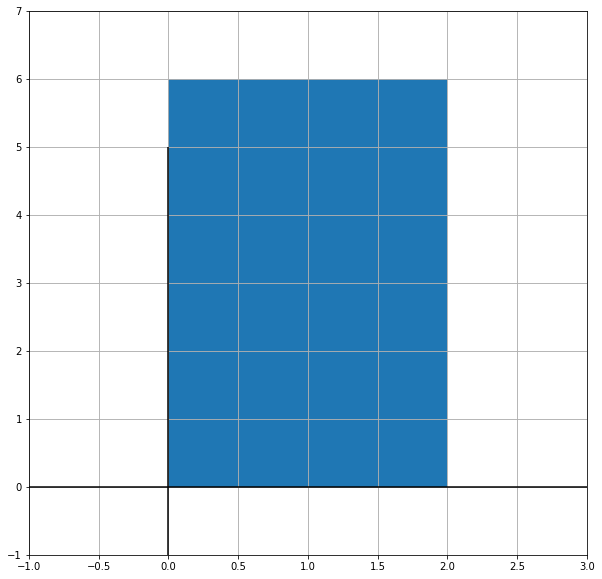

In [6]:
# Plot C

fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111)

ax.set_xlim(0-1, r_width+1)
ax.set_ylim(0-1, r_height+1)
ax.hlines(0, -1, 3)
ax.vlines(0, -1, 5)
ax.grid(which='major', linewidth=0.9)
rect = plt.Rectangle(rect_points[0], r_width, r_height)
ax.add_artist(rect)
plt.show()


#### Question 2

Evaluate $ \oint_C y^3 dx - x^3 dy $ where $ C $ is the the boundary of the region between the circles $ x^2 + y^2 = 4 $ and $ x^2 + y^2 = 16 $

In [7]:
P = y**3
Q = -x**3
dQx = sym.diff(Q, x)
dPy = sym.diff(P, y)

dQx, dPy

In [8]:
int_R = dQx - dPy
display(int_R)

int_R = sym.factor(int_R)
polar_int = r* int_R.subs(x**2+y**2, r**2)
display(polar_int)

In [9]:
rlim = [2, 4]
theta_lim = [0, 2*sym.pi]

sym.integrate(polar_int, (r, rlim[0], rlim[1]), (theta, theta_lim[0], theta_lim[1]))

#### Question 3

Use Green's Theorem to evaluate $ \oint_C \vec{F} \cdot d \vec{r} $, where

$$ \vec{F} = \left \langle \sqrt{x} + 6y, 4x + \sqrt{y}  \right \rangle $$

$ C $ consists of the arc of the curve $ y = 1x - x^2 $ from (0, 0) to (1,0) and the line segment from (1, 0) to (0, 0).

*Hint: check orientation of curve before applying theorem*

In [10]:
P = sym.sqrt(x) + 6*y
Q = 4*x + sym.sqrt(y)
ylim = [0, x-x**2]
xlim = [0, 1]
int_R = greens_ther(P, Q)
sol = -sym.integrate(int_R, (y, ylim[0], ylim[1]),(x, xlim[0],xlim[1]))
print(sol)

1/3


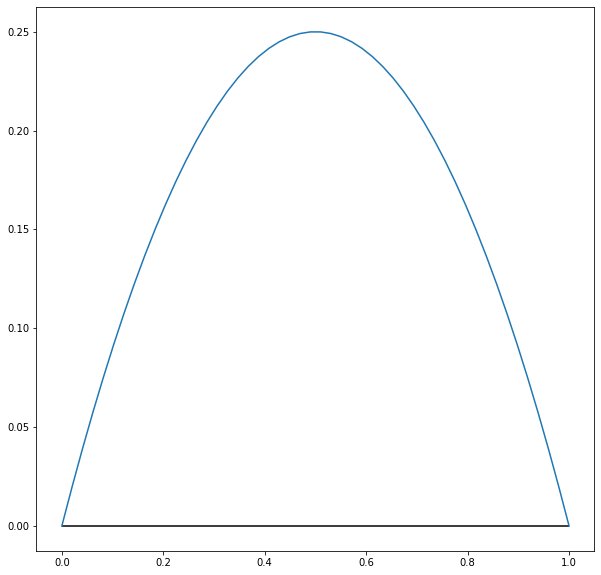

In [11]:
# Plot C

fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111)

xvals = np.linspace(0, 1)
yvals = xvals - xvals**2
plt.plot(xvals, yvals)
plt.hlines(0, 0, 1)
plt.show()

#### Question 4

Find the area of region enclosed by $ x = t - t^2, y = t - t^7, 0 \leq t \leq 1 $ using Green's Theorem

$$ \text{Area} = \iint_R dA = \frac{1}{2} \int_C -y dx + x dy $$

In [12]:
# F = <-y, x>
# r = <t-t^2, t-t^7>
# r' = <1 - 2t, 1-7t^5>
xt = t - t**4
yt = t - t**6
tlim = [0, 1]

dx = sym.diff(xt, t)
dy = sym.diff(yt, t)
dx, dy

In [13]:
int_A = -yt * dx + xt*dy
int_A = sym.simplify(int_A)
display(int_A)


In [14]:
(1/2) * sym.integrate(int_A, (t, tlim[0], tlim[1]))

#### **Flux Form of Green's Theorem:**

$$ \text{flux} = \oint \limits_C \vec{F} \cdot \vec{n} \ ds = \int_C f dy - g dx = \iint_R \left( \frac{\partial f}{\partial x} + \frac{\partial g}{\partial y} \right) dA $$

#### Question 5
Compute the flux of the vector field $ \left \langle x^4 - xy^3 \right \rangle $, out of the rectangle with vertices (0, 0), (3, 0), (3, 2), and (0, 2)

In [15]:
f = x**4
g = -x*y**3

dfx = sym.diff(f,x)
dgy = sym.diff(g, y)
dfx, dgy

In [16]:
int_R = dfx + dgy
int_R

In [17]:
flux = sym.integrate(int_R, (y, 0, 2),(x, 0, 3))
print(flux)

126


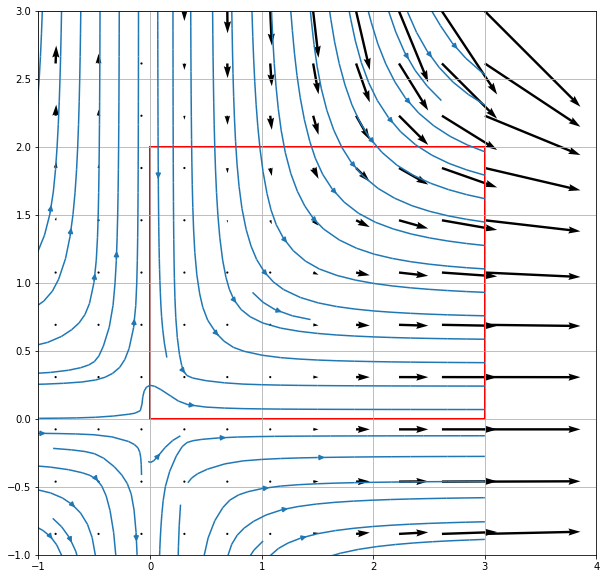

In [18]:
# Plot C

fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111)

r_width = 3
r_height = 2
rect = plt.Rectangle((0, 0), r_width, r_height, color='r', linewidth=2,fill=None)
ax.add_artist(rect)
ax.grid(1)
ax.set_xlim(-1, 4)
ax.set_ylim(-1, 3)

xvals,yvals = np.linspace(-2, 3, 14), np.linspace(-2, 3, 14)
X, Y = np.meshgrid(xvals, yvals)
U = X**4
V = -X*Y**3
ax.quiver(X, Y, U, V)
ax.streamplot(X, Y, U, V)
plt.show()


#### Question 6

Calculate the flux of the vector field $ \left \langle x^3, y^3 \right \rangle $, out of the annular region between $ x^2 + y^2 = 4 $ and $ x^2 + y^2 = 16 $

In [42]:
f = x**3
g = y**3
dfx = sym.diff(f, x)
dgy = sym.diff(g, y)
dfx, dgy

In [54]:
int_R = dfx + dgy
int_R = sym.factor(int_R)
display(int_R)

In [58]:
# Convert to polar
polar_int = int_R.subs(x**2+y**2, r**2)*r
polar_int

In [60]:
rlim = [2, 4]
theta_lim = [0, 2*sym.pi]
sol = sym.integrate(polar_int, (r, rlim[0], rlim[1]),(theta, theta_lim[0], theta_lim[1]))
sol

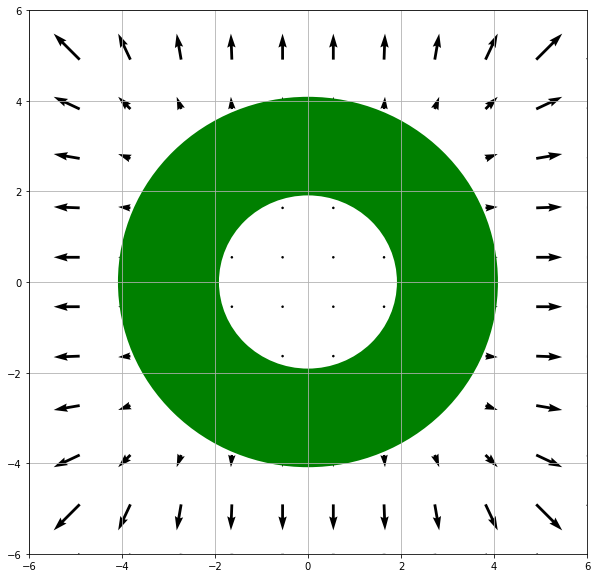

In [49]:
# Plot
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.grid()

radii = np.linspace(2, 4, 15)

lim = [-radii[-1]-2, radii[-1]+2]
ax.set_xlim(lim[0], lim[1])
ax.set_ylim(lim[0], lim[1])

for r in radii:
  circ = plt.Circle((0,0), r, fill=None, color='g', linewidth=8)
  ax.add_artist(circ)

X = np.linspace(lim[0], lim[1], 12)
Y = np.linspace(lim[0], lim[1], 12)
U, V = np.meshgrid(X, Y)

q = ax.quiver(X, Y, U**3, V**3)

plt.show()

#### Question 7

Use Green's Theorem to evaluate $ \oint_C \vec{F} \cdot d \vec{r} $, where

$$ \vec{F} = \left \langle \sqrt{x} + 3y, 2x + 3y  \right \rangle $$

$ C $ is the boundary of the region enclosed by $ y = x - x^2 $ and the $ x $-axis (oriented positively).

In [99]:
f = sym.sqrt(x) + 3*y
g = 2*x + 3*y
ylim = [0, x-x**2]
xlim = [0, 1]
int_R = flux_int(f, g)
display(int_R)
sol = sym.integrate(int_R, (y, ylim[0], ylim[1]),(x, xlim[0],xlim[1]))
display(sol)
sol.evalf()

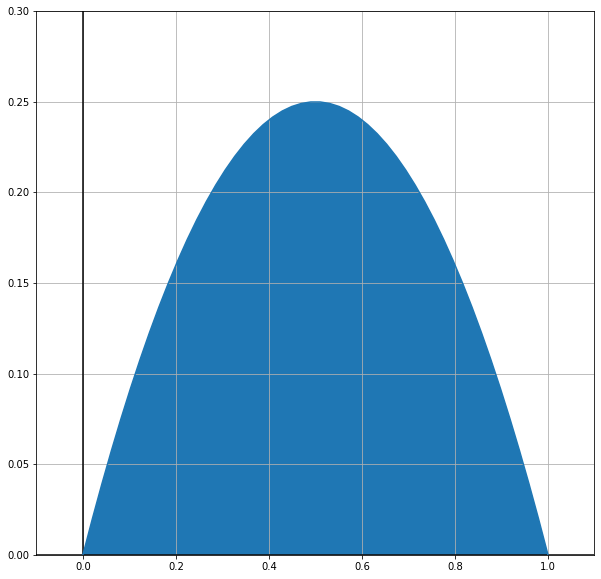

In [97]:
# Plot C

fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111)
ax.set_xlim((-0.1, 1.1))
ax.set_ylim(0, 0.3)
ax.grid()

xvals = np.linspace(0, 1)
yvals = xvals - xvals**2
plt.plot(xvals, yvals)
plt.hlines(0, -0.1, 1.1)
plt.vlines(0, -0.1, 0.6)
ax.fill_between(xvals, yvals)
plt.show()

#### Question 8

If $ C $ is the rectangle with vertices (0, 0), (2,0), (2,6), and (0, 6) then:

$$ \oint_C xy^2 dx + x^4 dy $$

In [101]:
r_width = 2
r_height = 6

rect_points = [(0,0), (r_width,0), (r_width, r_height), (0,r_height)]

P = x*y**2
Q = x**4
dQx = sym.diff(Q, x)
dPy = sym.diff(P, y)

dQx, dPy

In [102]:
# Evaluate using Green's Theorem
int_R = dQx - dPy
display(int_R)
sol = sym.integrate(int_R, (x, 0, r_width), (y, 0, r_height))
print(sol)

24


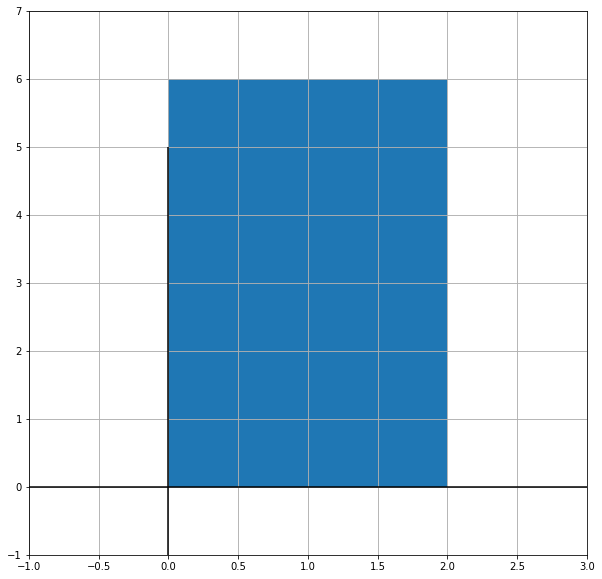

In [103]:
# Plot C

fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111)

ax.set_xlim(0-1, r_width+1)
ax.set_ylim(0-1, r_height+1)
ax.hlines(0, -1, 3)
ax.vlines(0, -1, 5)
ax.grid(which='major', linewidth=0.9)
rect = plt.Rectangle(rect_points[0], r_width, r_height)
ax.add_artist(rect)
plt.show()


#### Question 9

If $ C $ is the the boundary of the region between the circles $ x^2 + y^2 = 16 $ and $ x^2 + y^2 = 36 $ then: 
$$ \oint_C y^3 dx - x^3 dy $$

In [104]:
P = y**3
Q = -x**3
dQx = sym.diff(Q, x)
dPy = sym.diff(P, y)

dQx, dPy

In [105]:
int_R = dQx - dPy
display(int_R)

int_R = sym.factor(int_R)
polar_int = r* int_R.subs(x**2+y**2, r**2)
display(polar_int)

In [106]:
rlim = [4, 6]
theta_lim = [0, 2*sym.pi]

sym.integrate(polar_int, (r, rlim[0], rlim[1]), (theta, theta_lim[0], theta_lim[1]))

#### Question 10

Use Green's Theorem to evaluate , where

 If $ \vec{F} = \left \langle \sqrt{x} + 5y, 4x + \sqrt{y}  \right \rangle $ while $ C $ consists of the arc of the curve $ y = 1x - x^2 $ from (0, 0) to (1,0) and the line segment from (1, 0) to (0, 0) then: 

$$ \oint_C \vec{F} \cdot d \vec{r} = $$  

*Suggestion: check orientation of curve before applying theorem*

In [107]:
P = sym.sqrt(x) + 5*y
Q = 4*x + sym.sqrt(y)
ylim = [0, x-x**2]
xlim = [0, 1]
int_R = greens_ther(P, Q)
sol = -sym.integrate(int_R, (y, ylim[0], ylim[1]),(x, xlim[0],xlim[1]))
print(sol)

1/6


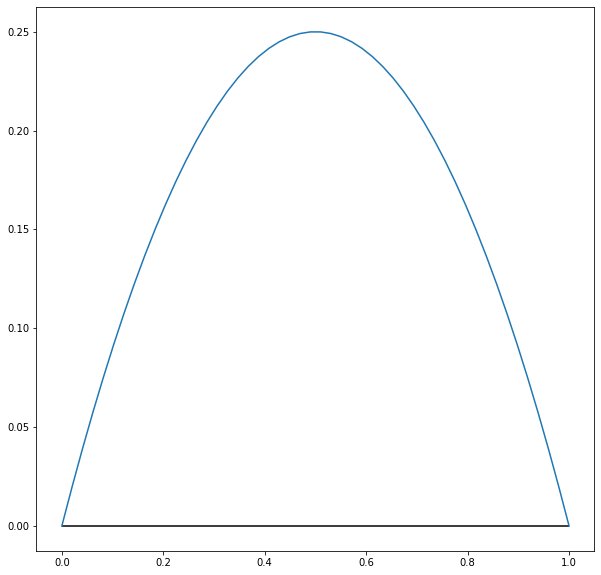

In [108]:
# Plot C

fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111)

xvals = np.linspace(0, 1)
yvals = xvals - xvals**2
plt.plot(xvals, yvals)
plt.hlines(0, 0, 1)
plt.show()

#### Question 11

The area of region enclosed by $ x = t - t^2, y = t - t^4, 0 \leq t \leq 1 $ is:

$$ \text{Area} = \iint_R dA = \frac{1}{2} \int_C -y dx + x dy $$

In [109]:
# F = <-y, x>

xt = t - t**2
yt = t - t**4
tlim = [0, 1]

dx = sym.diff(xt, t)
dy = sym.diff(yt, t)
dx, dy

In [110]:
int_A = -yt * dx + xt*dy
int_A = sym.simplify(int_A)
display(int_A)


In [111]:
(1/2) * sym.integrate(int_A, (t, tlim[0], tlim[1]))